Travelling salesman problem

Developer: Tanmoy Das
Date: July 10, 2024

# Model Formulation and Pyomo implementation

In [1]:
# Example Usage
from tsp_model import TravelingSalesmanProblem
num_cities = 20
tsp = TravelingSalesmanProblem(num_cities)
distance_matrix = tsp.generate_distance_matrix()
model = tsp.create_model()
route = tsp.solve()
tsp.print_route(route)

[[ 0 38 19 30 85 32 81 44 50 95 36 93 26 72 26 17 16 36 23 85]
 [68  0 13 84 85 71 87 93 67 42 20 16 85 28 13 87 27 53 26 28]
 [89 69  0 85 39 55 16 73 88 34 28 43 88 52 13 28 80 62 32 24]
 [14 37 85  0 16 36 89 92 88 20 43 95 27 50 92 52 70 94 40 46]
 [18 58 29 58  0 20 48 19 70 70 33 62 86 88 64 91 83 37 49 97]
 [19 24 41 66 66  0 89 37 60 84 79 12 67 33 35 51 19 76 25 75]
 [40 98 59 50 21 79  0 68 96 47 78 28 19 67 24 45 85 33 39 70]
 [12 29 96 55 95 94 94  0 55 34 85 65 75 92 61 22 46 51 84 95]
 [41 77 86 52 12 49 96 89  0 21 95 37 81 33 47 64 43 16 22 46]
 [16 74 17 56 12 36 80 60 85  0 50 85 80 83 32 90 90 54 51 76]
 [45 97 59 84 37 60 11 31 15 16  0 78 92 20 74 14 85 25 64 21]
 [14 32 16 69 54 83 21 28 62 74 65  0 46 58 68 49 47 64 15 36]
 [25 65 20 79 27 89 58 95 48 64 96 48  0 43 33 87 56 53 34 40]
 [74 43 14 46 87 37 80 44 42 15 49 26 46  0 69 85 97 94 43 31]
 [78 16 28 42 34 30 18 82 59 72 39 85 93 26  0 63 83 92 76 40]
 [64 75 54 53 68 45 50 31 10 31 99 93 47 28 93  0 10 50

In [2]:
model.pprint()
# model.constraint.pprint()

1 RangeSet Declarations
    N : Dimen=1, Size=20, Bounds=(1, 20)
        Key  : Finite : Members
        None :   True :  [1:20]

1 Param Declarations
    distance : Size=400, Index=N*N, Domain=Any, Default=None, Mutable=False
        Key      : Value
          (1, 1) :     0
          (1, 2) :    38
          (1, 3) :    19
          (1, 4) :    30
          (1, 5) :    85
          (1, 6) :    32
          (1, 7) :    81
          (1, 8) :    44
          (1, 9) :    50
         (1, 10) :    95
         (1, 11) :    36
         (1, 12) :    93
         (1, 13) :    26
         (1, 14) :    72
         (1, 15) :    26
         (1, 16) :    17
         (1, 17) :    16
         (1, 18) :    36
         (1, 19) :    23
         (1, 20) :    85
          (2, 1) :    68
          (2, 2) :     0
          (2, 3) :    13
          (2, 4) :    84
          (2, 5) :    85
          (2, 6) :    71
          (2, 7) :    87
          (2, 8) :    93
          (2, 9) :    67
         (2, 10) :    4

# Draw Network

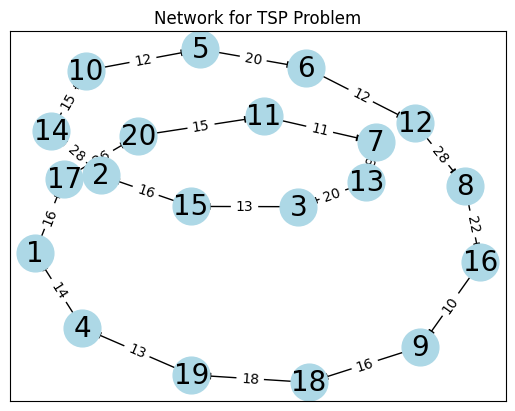

' The figure might have weird shape since we directly considered distance between cities, \nrather than coordinates and then calculate distance '

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.DiGraph()

# Add nodes
for i in range(1, num_cities):
    G.add_node(i)

# Add edges with weights
for r in route:
    #print(route)
    #print(r[0], r[1])
    G.add_edge(r[0], r[1], weight=distance_matrix[r[0]-1, r[1]-1])
    #G.add_edge(r[0], r[1], weight=distance_matrix[r[0], r[1]])

# Get positions for all nodes
pos = nx.spring_layout(G)

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')

# Draw the edges
for r in route:
    edges = [(r[i], r[i + 1]) for i in range(len(r) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='black', arrows=True)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

# Draw edge labels
edge_labels = {(r[0], r[1]): distance_matrix[r[0]-1, r[1]-1] for r in route}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Display the plot
plt.title("Network for TSP Problem")
plt.show()
""" The figure might have weird shape since we directly considered distance between cities, 
rather than coordinates and then calculate distance """

In [4]:
# distance_matrix#[1,10]

# Call Custom Genetic Algorithm for TSP

In [5]:
from genetic_algorithm_tsp import GeneticAlgorithmTSP 
import numpy as np
# !jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

# Parameters for the GA
pop_size = 100
num_generations = 500
mutation_rate = 0.01

# data 
num_cities = 10
# Generate a random distance matrix for the GA
distance_matrix = np.random.randint(10, 100, size=(num_cities, num_cities))
np.fill_diagonal(distance_matrix, 0)  # Distance from a city to itself is 0

# Solve TSP using the Genetic Algorithm
ga_tsp_solver = GeneticAlgorithmTSP(distance_matrix, pop_size, num_generations, mutation_rate)
best_path, best_distance = ga_tsp_solver.evolve_population()

print("\nBest Path:", best_path)
print("Best Distance:", best_distance)

Generation 0: Best Fitness = 320
Generation 1: Best Fitness = 335
Generation 2: Best Fitness = 354
Generation 3: Best Fitness = 338
Generation 4: Best Fitness = 338
Generation 5: Best Fitness = 377
Generation 6: Best Fitness = 327
Generation 7: Best Fitness = 367
Generation 8: Best Fitness = 375
Generation 9: Best Fitness = 336
Generation 10: Best Fitness = 388
Generation 11: Best Fitness = 350
Generation 12: Best Fitness = 373
Generation 13: Best Fitness = 321
Generation 14: Best Fitness = 364
Generation 15: Best Fitness = 366
Generation 16: Best Fitness = 366
Generation 17: Best Fitness = 381
Generation 18: Best Fitness = 330
Generation 19: Best Fitness = 364
Generation 20: Best Fitness = 346
Generation 21: Best Fitness = 365
Generation 22: Best Fitness = 352
Generation 23: Best Fitness = 333
Generation 24: Best Fitness = 343
Generation 25: Best Fitness = 333
Generation 26: Best Fitness = 329
Generation 27: Best Fitness = 393
Generation 28: Best Fitness = 377
Generation 29: Best Fitn

# Compare default GLPK solver vs Genetic Algorithm 